In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

### 数据加载及处理

In [2]:
df = pd.read_excel(r'D:\paper\safety\data\max_accident_data\accident_type.xlsx')
data = df.copy().drop('Unnamed: 6',axis =1)
data.columns = ['time','province','city','accident','death','injury']
data.head()

,time,province,city,accident,death,injury
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN


### 事故类型分析

In [3]:
data_max_type =  data['accident'].value_counts()
data_max_type[:50]
#查看前五十个

瓦斯爆炸      86
煤与瓦斯突出    36
火灾        36
透水        34
相撞        24
爆炸        21
撞车        18
道路交通事故    14
翻车        14
撞船        13
追尾        10
坠沟         8
炸药爆炸       8
道路运输事故     8
山体滑坡       8
沉船         7
发生火灾       6
翻沟         6
火药爆炸       5
渔船失去联系     5
烟花爆竹爆炸     5
瓦斯突出       5
翻坡         5
瓦斯燃烧       4
发生瓦斯爆炸     4
坍塌         4
煤尘爆炸       4
坠河         4
坠桥         4
火灾事故       4
粉尘爆炸       3
塌陷         3
撞人         3
发生透水       3
坠崖         3
垮塌         3
电缆着火       3
窒息         3
翻船         3
撞护栏        3
碰撞         3
翻下陡坡       3
两车相撞       3
发生爆炸事故     3
连环撞车       2
中巴大货相撞     2
大客小轿追尾     2
失踪         2
发生火灾事故     2
电梯坠落       2
Name: accident, dtype: int64

In [4]:
fire = data_max_type[data_max_type.index.str.contains('燃|火')]
fire_num = fire.sum()

blast = data_max_type[data_max_type.index.str.contains('爆')]
blast_num = blast.sum()

traffic = data_max_type[data_max_type.index.str.contains('交通|碰|撞|翻|尾|溜|坠|船|运输|路|车|沉没|搁浅')]
traffic_num = traffic.sum()

collapse =  data_max_type[data_max_type.index.str.contains('坍|塌|滑坡|崩|溃坝')]
collapse_num = collapse.sum()

mine = data_max_type[data_max_type.index.str.contains('煤|瓦斯|透水|冒顶|放炮|顶板')]
mine_num = mine.sum()

poi = data_max_type[data_max_type.index.str.contains('毒|窒息')]
poi_num = poi.sum()

other = list(set(data_max_type.index.tolist()) - set(mine.index.tolist())\
             -set(blast.index.tolist())\
             -set(traffic.index.tolist())\
             -set(collapse.index.tolist())\
             -set(poi.index.tolist())\
             -set(fire.index.tolist()))

other_num = 0
for var in data_max_type.index:
    if var in other:
        other_num += data_max_type.loc[var]
print('other共有{}起事故\n------------\n其中的类型为：{}'.format(other_num,other))

other共有24起事故
------------
其中的类型为：['铝水伤人', '钢丝绳断绳', '发生铁水外溢', '暴雨洪涝', '安石隧道掌子面突泥涌水', '冲击地压事故', '失踪', '潮水滞留海上', '工地发生触电事故', '炉底烧穿', '液氨泄漏', '洪水', '客机降落失事', '大风冰雹暴雨', '刮擦', '物体打击', '群众拥挤踩踏', '钢水洒出', '失去联系', '施工中升降机发生事故']


In [5]:
type_num = [blast_num,poi_num,other_num,fire_num,collapse_num,mine_num,traffic_num]
type_acci = ['爆炸','中毒与窒息','其他','火灾','坍塌','矿业','交通']

In [6]:
for i,j in zip(type_acci,type_num):
    print("{}事故数量{}起".format(i,j))

爆炸事故数量186起
中毒与窒息事故数量17起
其他事故数量24起
火灾事故数量109起
坍塌事故数量55起
矿业事故数量217起
交通事故数量397起


In [7]:
data_type = pd.Series(type_num,index = type_acci)
data_type

爆炸       186
中毒与窒息     17
其他        24
火灾       109
坍塌        55
矿业       217
交通       397
dtype: int64

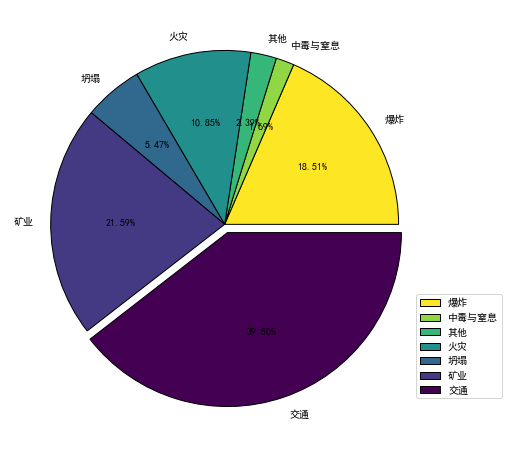

In [21]:
data_type.plot(kind='pie',
               autopct='%.2f%%',
               cmap='viridis_r',
               wedgeprops={'linewidth': 1, 'edgecolor': "black"},
                figsize=(12,8),
#                 shadow = True,
                explode = [0,0,0,0,0,0,0.05])
plt.legend(loc = (0.94,0.1))
plt.axis('off')
plt.savefig(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\4.png',dpi = 150)

### 如果再细分的话，比如在矿业和交通中还是可以细分

In [22]:
#矿业事故中死亡人数最多，可以单独进行分析
print(mine.sum())

217


In [23]:
type_1 = mine[mine.index.str.contains('煤与瓦斯突出')]
type_2 = mine[mine.index.str.contains('瓦斯爆炸|瓦斯燃烧|瓦斯燃爆')]
type_3 = mine[mine.index.str.contains('瓦斯突')]#这个是用来单独求瓦斯突出的,其中瓦斯和瓦斯事故共4期，要算在这里
type_4 = mine[mine.index.str.contains('冒顶|顶板')]
type_5 = mine[mine.index.str.contains('放炮')]
type_6 = mine[mine.index.str.contains('透水')]

type_7 = list(set(mine.index.tolist()) \
              - set(type_1.index.tolist()) \
              - set(type_2.index.tolist()) \
              - set(type_3.index.tolist()) \
              - set(type_4.index.tolist()) \
              - set(type_5.index.tolist()) \
              - set(type_6.index.tolist()))
type_7_num = 0
for var in mine.index:
    if var in type_7:
        type_7_num += mine.loc[var]

print(type_7_num)        
type_7

17


['煤矿副井筒人车钢丝绳断裂',
 '焦炉煤气柜爆炸',
 '煤矿溜灰管坠落',
 '甲醇运输车与运煤车追尾致运煤车自燃起火',
 '煤气中毒',
 '李家沟煤矿井下发生事故',
 '煤气罐爆炸',
 '煤气泄漏',
 '煤尘爆炸',
 '瓦斯事故',
 '瓦斯']

In [24]:
type_3
#去掉煤与瓦斯突出的数量，最后瓦斯突出只有6起

煤与瓦斯突出        36
瓦斯突出           5
瓦斯突出事故         1
煤与瓦斯突出事故       1
广隆煤矿煤与瓦斯突出     1
煤与瓦斯突出及爆炸      1
瓦斯突橱           1
Name: accident, dtype: int64

In [25]:
set(type_5.index) & set(type_6.index)
#存在着相同的一个事件，应该归类为透水

{'放炮引发透水事故'}

In [26]:
print(type_1.sum(),type_2.sum(),type_3.sum(),type_4.sum(),type_5.sum(),type_6.sum(),len(type_7))

39 101 46 7 3 44 11


In [27]:
ls_mine_type = ['煤与瓦斯突出','瓦斯突出','瓦斯燃烧爆炸','冒顶','放炮','透水','其他']
ls_mine_num = [39,6,101,7,3,44,17]
sum(ls_mine_num) #解决问题

217

In [38]:
data_mine_type = pd.Series(ls_mine_num,index = ls_mine_type).sort_values(ascending=False)
data_mine_type

瓦斯燃烧爆炸    101
透水         44
煤与瓦斯突出     39
其他         17
冒顶          7
瓦斯突出        6
放炮          3
dtype: int64

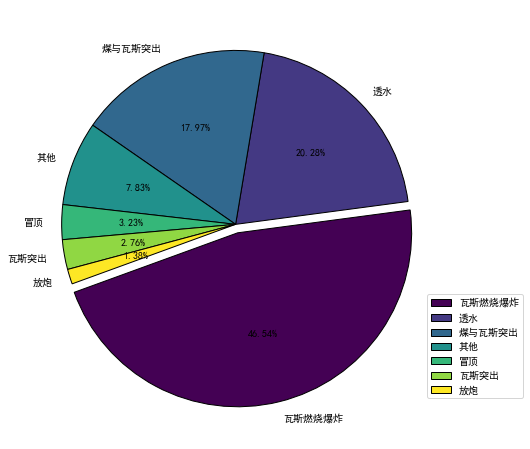

In [48]:
data_mine_type.plot(kind='pie',
               autopct='%.2f%%',
               cmap='viridis',
                startangle=200,
               wedgeprops={'linewidth': 1, 'edgecolor': "black"},
                figsize=(12,8),
#                 shadow = True,
                explode = [0.05,0,0,0,0,0,0])
plt.legend(loc = (0.94,0.1))
plt.axis('off')
plt.savefig(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\5.png',dpi = 150)